In [28]:
import mysql.connector

In [29]:
mydb = mysql.connector.connect(
    host='localhost',
    user='root',
    password='Alliance98',
    port='3306',
    database='swye360'
)

In [30]:
mycursor = mydb.cursor()
firstName = 'Hayden'
lastName = 'Jones'

In [31]:
mycursor.execute("SELECT first_name, last_name, studentlogin FROM student WHERE first_name = %s AND last_name = %s",
                     (firstName, lastName))
x = mycursor.fetchall()
currentUserID = x[0][2]
mycursor.execute("SELECT urlAppId, appdetails, SUM(totalSpentTime) AS TotalTime FROM students_analytics WHERE loginid=%s GROUP BY urlAppId ORDER BY TotalTime DESC",(currentUserID,))
top_used_software = mycursor.fetchall()

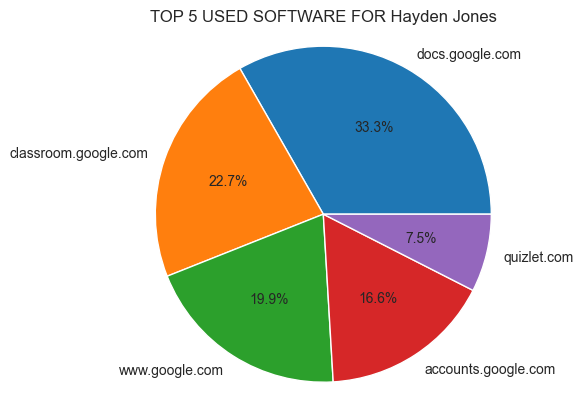

In [32]:
from urllib.parse import urlparse
import matplotlib.pyplot as plt
W1 = urlparse(top_used_software[0][1])
W2 = urlparse(top_used_software[1][1])
W3 = urlparse(top_used_software[2][1])
W4 = urlparse(top_used_software[3][1])
W5 = urlparse(top_used_software[4][1])
sizes = [int(top_used_software[0][2]),
         int(top_used_software[1][2]),
         int(top_used_software[2][2]),
         int(top_used_software[3][2]),
         int(top_used_software[4][2])]
Website1 = W1.netloc
Website2 = W2.netloc
Website3 = W3.netloc
Website4 = W4.netloc
Website5 = W5.netloc

if W1.netloc == '':
    Website1 = W1.path
if Website2 == '':
    Website2 = W2.path
if Website3 == '':
    Website3 = W3.path
if Website4 == '':
    Website4 = W4.path
if Website5 == '':
    Website5 = W5.path

labels = [str(Website1), str(Website2), str(Website3), str(Website4), str(Website5)]
# Pie chart, where the slices will be ordered and plotted counter-clockwise:

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('TOP 5 USED SOFTWARE FOR ' + firstName +' ' + lastName)
plt.show()

In [33]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization

In [34]:
#we need to create an x matrix. This will be the variables that we are going to use in our prediction.
#I am thinking we need a list of top websites and time spent, maybe a dictionary could do? We have a website and this maps to the time spent
#We also need race and sex data to be part of this independent vector
#####
#Our "target" variable, basically y, is gonna be some predicted metric like class grade or test grade
##############
#Okay so what do we need to do? We need to basically start organizing the data into a tuple I guess?
#I think we basically go through every student and make a tuple like this:
#x = [[dictionary of software], race, sex]
#y = grade

In [38]:
df = pd.read_sql('SELECT first_name FROM student', mydb)

/var/folders/d3/nfzwy5m10g57kw0vzs3z2bwc0000gn/T/ipykernel_4503/3984840238.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql('SELECT first_name FROM student', mydb)
